<a href="https://colab.research.google.com/github/usama879/creditcardfraudproject/blob/main/CICMalDroid_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Environment Set Up

##1.1 Installing Libraires

In [1]:
#!pip install pandas scikit-learn numpy matplotlib -U gdown

##1.2 Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from collections import Counter
import pprint
from datetime import date
from IPython.display import display
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix,
    classification_report, ConfusionMatrixDisplay, roc_curve,
    auc, precision_recall_curve, precision_recall_fscore_support
)
from scipy.stats import ttest_rel, wilcoxon
import joblib
import gdown

print("Environment setup complete — all libraries impoted successfully")


Environment setup complete — all libraries impoted successfully


#2.Dataset Loading & Exploration

##2.1 Data Loading

In [3]:
file_id = '1CUNdHFe_dzqAK-jAeW0l6JRJZZMrDrHO'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'CICMalDroidDataset.csv', quiet=False)

df = pd.read_csv('CICMalDroidDataset.csv')

Downloading...
From: https://drive.google.com/uc?id=1CUNdHFe_dzqAK-jAeW0l6JRJZZMrDrHO
To: /content/CICMalDroidDataset.csv
100%|██████████| 11.7M/11.7M [00:00<00:00, 41.0MB/s]


##2.2 Dataset Dimensions

In [4]:
print("(Rows, Columns):", df.shape)

(Rows, Columns): (11598, 471)


##2.3 Column Names

In [5]:
print(df.columns.tolist())

['ACCESS_PERSONAL_INFO___', 'ALTER_PHONE_STATE___', 'ANTI_DEBUG_____', 'CREATE_FOLDER_____', 'CREATE_PROCESS`_____', 'CREATE_THREAD_____', 'DEVICE_ACCESS_____', 'EXECUTE_____', 'FS_ACCESS____', 'FS_ACCESS()____', 'FS_ACCESS(CREATE)____', 'FS_ACCESS(CREATE__APPEND)__', 'FS_ACCESS(CREATE__READ)__', 'FS_ACCESS(CREATE__READ__WRITE)', 'FS_ACCESS(CREATE__WRITE)__', 'FS_ACCESS(CREATE__WRITE__APPEND)', 'FS_ACCESS(READ)____', 'FS_ACCESS(READ__WRITE)__', 'FS_ACCESS(WRITE)____', 'FS_PIPE_ACCESS___', 'FS_PIPE_ACCESS()___', 'FS_PIPE_ACCESS(READ)___', 'FS_PIPE_ACCESS(READ__)_', 'FS_PIPE_ACCESS(READ__WRITE)_', 'FS_PIPE_ACCESS(WRITE)___', 'NETWORK_ACCESS____', 'NETWORK_ACCESS()____', 'NETWORK_ACCESS(READ)____', 'NETWORK_ACCESS(READ__WRITE)__', 'NETWORK_ACCESS(READ__WRITE__)', 'NETWORK_ACCESS(WRITE)____', 'NETWORK_ACCESS(WRITE__)__', 'SMS_SEND____', 'TERMINATE_PROCESS', 'TERMINATE_THREAD', '__arm_nr_cacheflush', '__arm_nr_set_tls', '_llseek', '_newselect', 'accept', 'access', 'add', 'addAccessibilityIn

##2.4 Columns Datatype

In [6]:
column_dtypes = df.dtypes.to_frame(name='DataType')
column_dtypes.reset_index(inplace=True)
column_dtypes.columns = ['Column', 'DataType']
display(column_dtypes)

,Column,DataType
0,ACCESS_PERSONAL_INFO___,int64
1,ALTER_PHONE_STATE___,int64
2,ANTI_DEBUG_____,int64
3,CREATE_FOLDER_____,int64
4,CREATE_PROCESS`_____,int64
...,...,...
466,watchRotation,int64
467,windowGainedFocus,int64
468,write,int64
469,writev,int64


##2.5 Dataset Structure

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11598 entries, 0 to 11597
Columns: 471 entries, ACCESS_PERSONAL_INFO___ to Class
dtypes: int64(471)
memory usage: 41.7 MB


##2.6 First 5 Rows of Dataset

In [8]:
display(df.head())

,ACCESS_PERSONAL_INFO___,ALTER_PHONE_STATE___,ANTI_DEBUG_____,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,DEVICE_ACCESS_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,...,utimes,vfork,vibrate,vibratePattern,wait4,watchRotation,windowGainedFocus,write,writev,Class
0,1,0,0,3,0,14,2,0,3,0,...,0,0,0,0,0,0,0,37,10,1
1,3,0,0,6,0,42,91,0,32,0,...,0,0,0,0,0,0,2,2838,46,1
2,2,0,0,4,0,23,3,0,17,2,...,0,0,0,0,0,0,1,111,20,1
3,1,0,0,4,0,27,9,0,36,0,...,0,0,0,0,0,0,7,987,197,1
4,3,0,0,11,0,18,3,0,16,0,...,0,0,0,0,0,0,1,98,25,1


##2.6 Last 5 Rows of Dataset

In [9]:
display(df.tail())

,ACCESS_PERSONAL_INFO___,ALTER_PHONE_STATE___,ANTI_DEBUG_____,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,DEVICE_ACCESS_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,...,utimes,vfork,vibrate,vibratePattern,wait4,watchRotation,windowGainedFocus,write,writev,Class
11593,2,0,0,11,0,61,13,0,66,17,...,0,0,0,0,0,0,10,2764,236,5
11594,6,0,0,10,1,69,50,1,118,15,...,0,0,0,0,1,0,5,4417,295,5
11595,0,0,0,0,0,21,16,0,48,9,...,0,0,0,0,0,0,5,241,67,5
11596,1,0,0,15,0,90,80,0,239,50,...,0,0,0,0,0,0,3,1703,774,5
11597,0,0,0,10,0,47,6,0,44,11,...,0,0,0,0,0,0,13,3102,186,5


#3.Exploratory Data Analysis (EDA) Summary Statistics

In [10]:
pd.set_option('display.max_columns', None)
summary_stats = df.describe()
summary_stats

,ACCESS_PERSONAL_INFO___,ALTER_PHONE_STATE___,ANTI_DEBUG_____,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,DEVICE_ACCESS_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,FS_ACCESS(CREATE)____,FS_ACCESS(CREATE__APPEND)__,FS_ACCESS(CREATE__READ)__,FS_ACCESS(CREATE__READ__WRITE),FS_ACCESS(CREATE__WRITE)__,FS_ACCESS(CREATE__WRITE__APPEND),FS_ACCESS(READ)____,FS_ACCESS(READ__WRITE)__,FS_ACCESS(WRITE)____,FS_PIPE_ACCESS___,FS_PIPE_ACCESS()___,FS_PIPE_ACCESS(READ)___,FS_PIPE_ACCESS(READ__)_,FS_PIPE_ACCESS(READ__WRITE)_,FS_PIPE_ACCESS(WRITE)___,NETWORK_ACCESS____,NETWORK_ACCESS()____,NETWORK_ACCESS(READ)____,NETWORK_ACCESS(READ__WRITE)__,NETWORK_ACCESS(READ__WRITE__),NETWORK_ACCESS(WRITE)____,NETWORK_ACCESS(WRITE__)__,SMS_SEND____,TERMINATE_PROCESS,TERMINATE_THREAD,__arm_nr_cacheflush,__arm_nr_set_tls,_llseek,_newselect,accept,access,add,addAccessibilityInteractionConnection,addAccountExplicitly,addClient,addPeriodicSync,addStatusChangeListener,addToDisplay,addToDisplayWithoutInputChannel,addWithoutInputChannel,attachEngine,beginRestoreSession,bind,brk,cancelAllNotifications,cancelNotificationWithTag,cancelSync,cancelToast,cancelVibrate,capset,chdir,checkOperation,checkPackage,checkPermission,checkSignatures,chmod,chown32,clock_getres,clock_gettime,clone,close,collapsePanels,connect,currentToCanonicalPackageNames,dataChanged,deleteHost,disconnect,displayCompletions,dup,dup2,endRestoreSession,engineShown,enqueueNotificationWithTag,enqueueToast,epoll_create,epoll_ctl,epoll_wait,eventfd2,execve,exit,exit_group,faccessat,fchmod,fchown32,fcntl,fcntl64,fdatasync,finishDrawing,finishInput,finishSpellCheckerService,flock,fork,fstat64,fstatfs64,fsync,ftruncate,ftruncate64,futex,geocoderIsPresent,getAccounts,getAccountsAsUser,getActiveAdmins,getActiveNetworkInfo,getActivePhoneType,getActivityInfo,getAllCellInfo,getAllNetworkInfo,getAllPkgUsageStats,getAllProviders,getAnimationScale,getAppWidgetIds,getAppWidgetInfo,getApplicationEnabledSetting,getApplicationInfo,getApplicationRestrictions,getAuthenticatorTypes,getBestProvider,getBoolean,getCallState,getCameraDisabled,getCameraInfo,getCellLocation,getClientDefaultLanguage,getComponentEnabledSetting,getConfiguredNetworks,getConnectionInfo,getCurrentInputMethodSubtype,getCurrentModeType,getCurrentSpellChecker,getCurrentSpellCheckerSubtype,getDataActivity,getDataNetworkType,getDataState,getDeviceId,getDeviceList,getDeviceOwner,getDeviceSvn,getDhcpInfo,getDisplayFrame,getDisplayIds,getDisplayInfo,getEnabledAccessibilityServiceList,getEnabledInputMethodList,getEnabledInputMethodSubtypeList,getFlashlightEnabled,getFromLocation,getGlobalSearchActivity,getGroupIdLevel1,getHeightHint,getIccSerialNumber,getInTouchMode,getInputDevice,getInputDeviceIds,getInputMethodList,getInstallLocation,getInstalledApplications,getInstalledPackages,getInstalledProviders,getInstallerPackageName,getIsSyncable,getLastChosenActivity,getLastInputMethodSubtype,getLastLocation,getLine1Number,getLong,getMasterSyncAutomatically,getMessenger,getMobileDataEnabled,getMobileIfaces,getMode,getNameForUid,getNeighboringCellInfo,getNetworkInfo,getNetworkPreference,getNightMode,getNumberOfCameras,getPackageGids,getPackageInfo,getPackageSizeInfo,getPackagesForUid,getPassword,getPermissionGroupInfo,getPermissionInfo,getPreferredActivities,getPreferredPackages,getPrimaryClip,getProviderInfo,getProviderProperties,getProviders,getProxy,getReceiverInfo,getRingerMode,getRingtonePlayer,getScanResults,getSearchableInfo,getSearchablesInGlobalSearch,getServiceInfo,getSpellCheckerService,getState,getStorageEncryptionStatus,getStreamMaxVolume,getStreamVolume,getString,getSubscriberId,getSyncAutomatically,getSystemAvailableFeatures,getSystemSharedLibraryNames,getTetheredIfaces,getUserData,getUserIcon,getUserRestrictions,getUserSerialNumber,getUsers,getVibrateSetting,getVoiceMailAlphaTag,getVoiceMailNumber,getWallpaper,getWallpaperInfo,getWidthHint,getWifiApConfiguration,getWifiApEnabledState,getWifiDisplayStatus,getWifiEnabledState,getWifiS

#4.Data Visualizations

##4.1 Class Distribution Plot

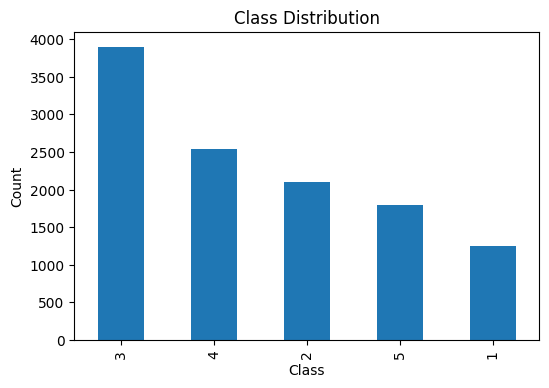

,Count,count
0,3,3904
1,4,2546
2,2,2100
3,5,1795
4,1,1253


In [11]:
plt.figure(figsize=(6,4))
counts = df['Class'].value_counts()
counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
display(pd.DataFrame(counts).reset_index().rename(columns={'index':'Class', 'Class':'Count'}))


##4.2 Correlation Heatmap (Top 20 Most Variable Features)

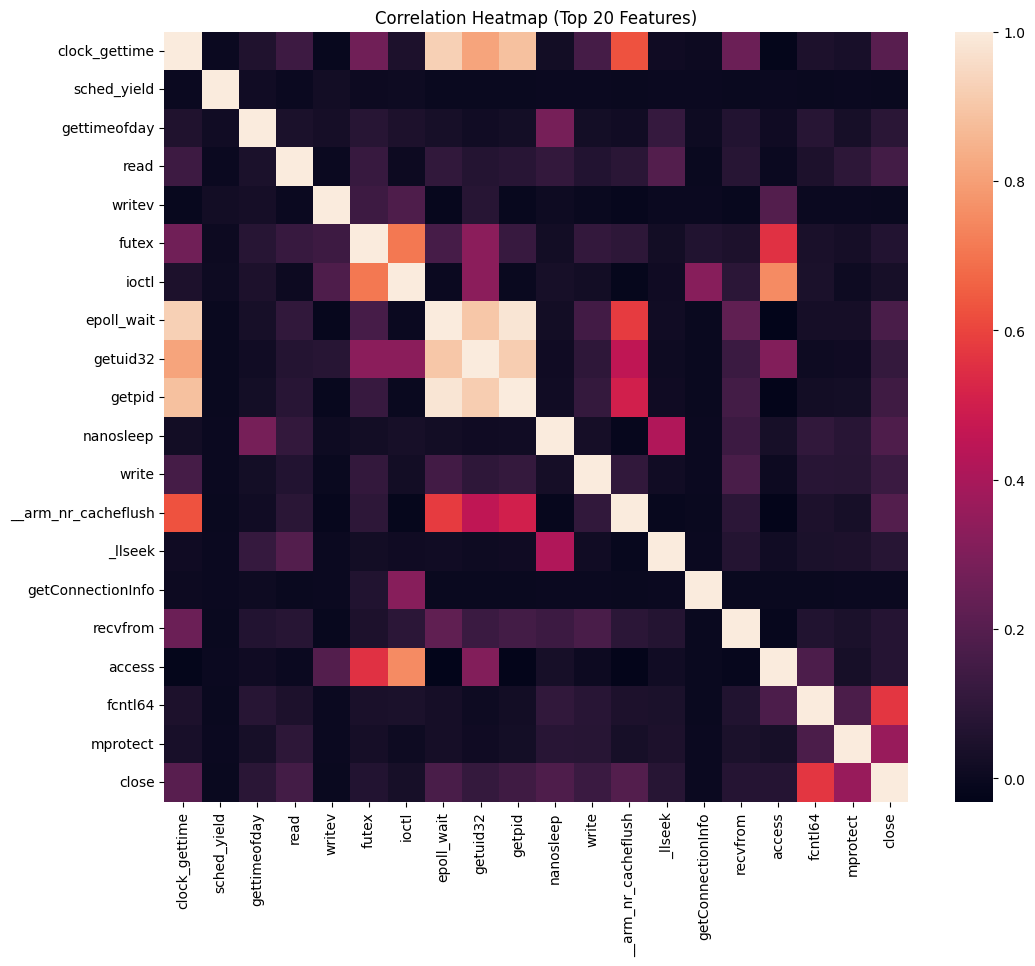

,clock_gettime,sched_yield,gettimeofday,read,writev,futex,ioctl,epoll_wait,getuid32,getpid,nanosleep,write,__arm_nr_cacheflush,_llseek,getConnectionInfo,recvfrom,access,fcntl64,mprotect,close
clock_gettime,1.000000,-0.001750,0.056168,0.136424,-0.007177,0.264002,0.048705,0.925669,0.812863,0.885857,0.019374,0.157452,0.626645,0.013076,0.002123,0.251614,-0.021004,0.046072,0.037492,0.204149
sched_yield,-0.001750,1.000000,0.016269,-0.002418,0.017430,0.001759,0.005916,-0.004414,-0.004190,-0.003672,-0.000741,-0.001911,-0.003737,-0.000989,-0.000403,-0.003349,-0.001720,-0.003110,-0.001915,-0.003923
gettimeofday,0.056168,0.016269,1.000000,0.043560,0.028556,0.075157,0.046169,0.030801,0.016467,0.021801,0.279716,0.021783,0.015180,0.115411,0.006579,0.062634,0.011137,0.075013,0.031588,0.082139
read,0.136424,-0.002418,0.043560,1.000000,-0.000623,0.121341,0.003195,0.103174,0.066162,0.078112,0.107522,0.065001,0.084140,0.191505,-0.003206,0.074226,0.000102,0.046634,0.092530,0.153877
writev,-0.007177,0.017430,0.028556,-0.000623,1.000000,0.135314,0.181832,-0.012849,0.074538,-0.010748,0.007748,-0.004491,-0.012101,0.000711,-0.001304,-0.010160,0.192848,-0.002775,-0.001069,-0.005064
futex,0.264002,0.001759,0.075157,0.121341,0.135314,1.000000,0.706300,0.158856,0.328184,0.118519,0.020657,0.107992,0.090658,0.017432,0.058192,0.045984,0.555728,0.038643,0.029360,0.064886
ioctl,0.048705,0.005916,0.046169,0.003195,0.181832,0.706300,1.000000,0.000183,0.327953,-0.003299,0.031480,0.018214,-0.017091,0.010476,0.319793,0.089290,0.753378,0.042784,0.007755,0.032572
epoll_wait,0.925669,-0.004414,0.030801,0.103174,-0.012849,0.158856,0.000183,1.000000,0.900120,0.982426,0.021338,0.147119,0.579185,0.013553,-0.006535,0.223371,-0.030966,0.027752,0.026068,0.166969
getuid32,0.812863,-0.004190,0.016467,0.066162,0.074538,0.328184,0.327953,0.900120,1.000000,0.918972,0.011145,0.097539,0.456241,0.006024,-0.006671,0.129616,0.309707,0.006802,0.010824,0.113097
getpid,0.885857,-0.003672,0.021801,0.078112,-0.010748,0.118519,-0.003299,0.982426,0.918972,1.000000,0.013710,0.110869,0.504491,0.010127,-0.005591,0.153611,-0.025396,0.020596,0.024395,0.139975


In [12]:
top20 = df.var().sort_values(ascending=False).head(20).index
plt.figure(figsize=(12,10))
sns.heatmap(df[top20].corr(), annot=False)
plt.title('Correlation Heatmap (Top 20 Features)')
plt.show()
display(df[top20].corr())

##4.3 Top 20 Most Frequent API/System Call Features

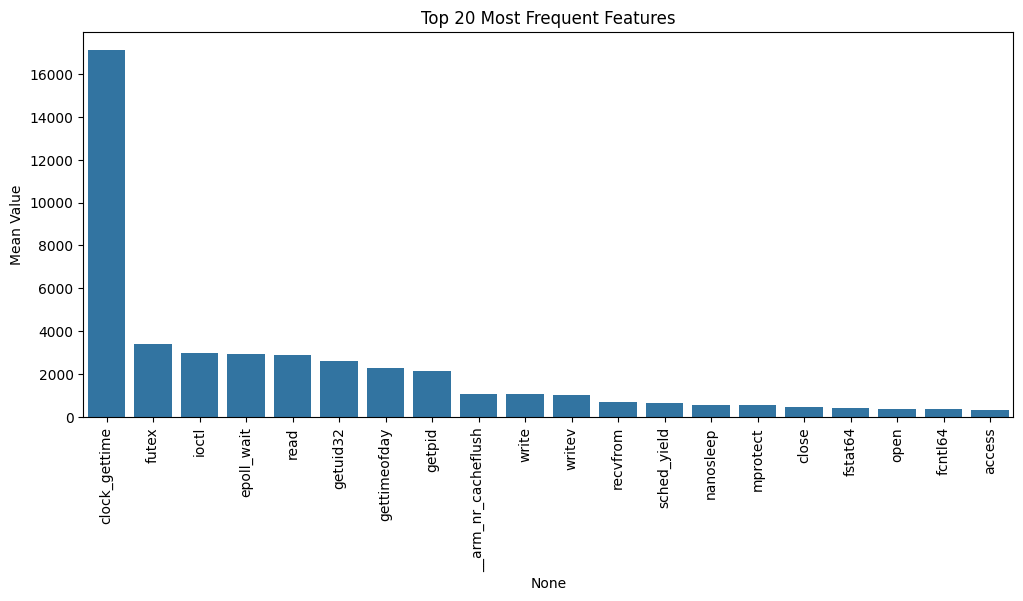

,Feature,Mean Value
0,clock_gettime,17103.524573
1,futex,3403.121659
2,ioctl,3003.004915
3,epoll_wait,2959.879290
4,read,2882.256165
5,getuid32,2630.008277
6,gettimeofday,2297.242283
7,getpid,2151.317727
8,__arm_nr_cacheflush,1083.033885
9,write,1071.197362


In [13]:
freq = df.drop('Class', axis=1).mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,5))
sns.barplot(x=freq.index, y=freq.values)
plt.xticks(rotation=90)
plt.title('Top 20 Most Frequent Features')
plt.ylabel('Mean Value')
plt.show()
display(pd.DataFrame(freq).reset_index().rename(columns={'index':'Feature', 0:'Mean Value'}))

##4.4 Boxplot for Selected Key Features

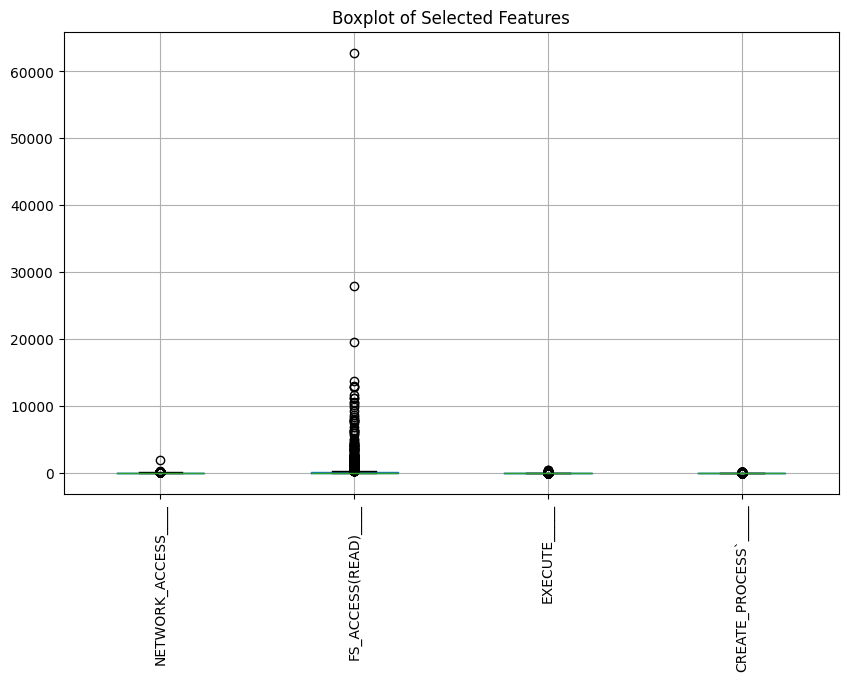

,NETWORK_ACCESS____,FS_ACCESS(READ)____,EXECUTE_____,CREATE_PROCESS`_____
count,11598.000000,11598.000000,11598.00000,11598.000000
mean,5.401621,229.651319,2.25125,0.983877
std,19.466439,886.719497,9.86903,4.061886
min,0.000000,0.000000,0.00000,0.000000
25%,0.000000,10.000000,0.00000,0.000000
50%,0.000000,18.000000,0.00000,0.000000
75%,10.000000,123.000000,0.00000,0.000000
max,1832.000000,62791.000000,399.00000,140.000000


In [14]:
features = ['NETWORK_ACCESS____', 'FS_ACCESS(READ)____', 'EXECUTE_____', 'CREATE_PROCESS`_____']
plt.figure(figsize=(10,6))
df[features].boxplot()
plt.title('Boxplot of Selected Features')
plt.xticks(rotation=90)
plt.show()
display(df[features].describe())

##4.5 PCA 2D Scatter

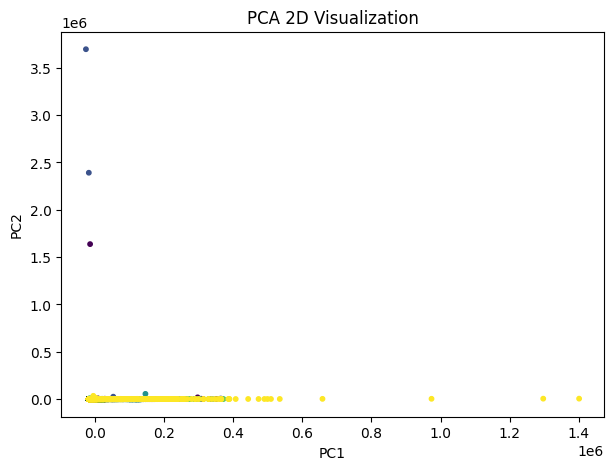

,PC1,PC2,Class
0,-18118.969267,-820.995197,1
1,18945.259542,-567.374851,1
2,-17677.878334,-817.280386,1
3,-8003.808021,-763.833679,1
4,-17826.590342,-817.704195,1
5,-18206.738305,-824.160111,1
6,-18122.290463,-822.392107,1
7,-17377.469283,-794.690330,1
8,-18224.499666,-824.295593,1
9,-16838.844080,-815.165614,1


In [15]:
X = df.drop('Class', axis=1)
pca = PCA(n_components=2)
p = pca.fit_transform(X)
plt.figure(figsize=(7,5))
plt.scatter(p[:,0], p[:,1], c=df['Class'], s=10)
plt.title('PCA 2D Visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
pca_df = pd.DataFrame(p, columns=['PC1','PC2'])
pca_df['Class'] = df['Class'].values
display(pca_df.head(10))

##4.6 Feature Distribution

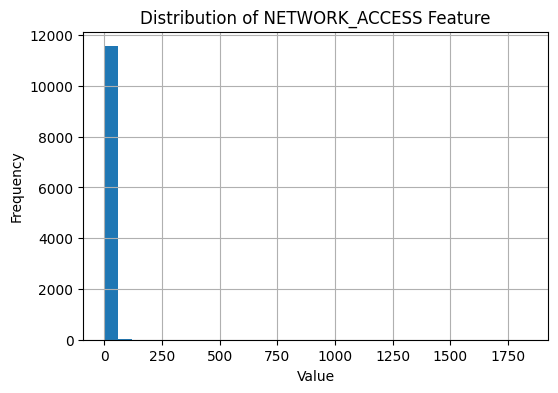

,NETWORK_ACCESS____
count,11598.000000
mean,5.401621
std,19.466439
min,0.000000
25%,0.000000
50%,0.000000
75%,10.000000
max,1832.000000


In [16]:
plt.figure(figsize=(6,4))
df['NETWORK_ACCESS____'].hist(bins=30)
plt.title('Distribution of NETWORK_ACCESS Feature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
display(df['NETWORK_ACCESS____'].describe())

#5.Data Pre-processing

##5.1 Check for Missing Values

In [17]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("Missing Values Found:")
    print(missing_values)
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


##5.2 Check for Duplicate Records

             Type  Count
0  Duplicate Rows     72
1     Unique Rows  11526


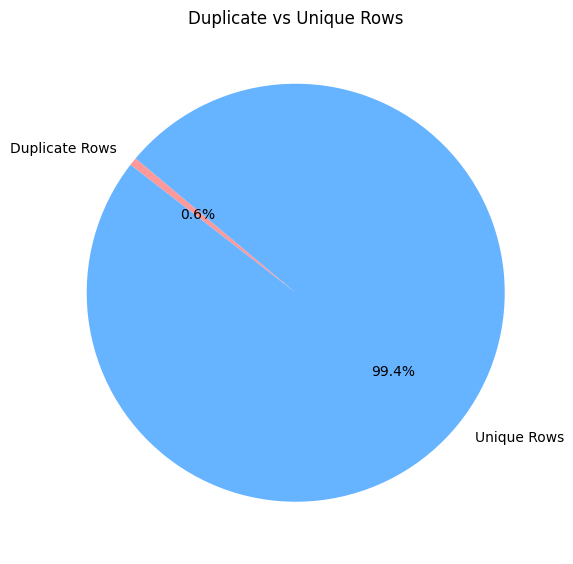

In [18]:
total_duplicates = df.duplicated().sum()
non_duplicates = len(df) - total_duplicates
duplicate_table = pd.DataFrame({
    'Type': ['Duplicate Rows', 'Unique Rows'],
    'Count': [total_duplicates, non_duplicates]
})
print(duplicate_table)

plt.figure(figsize=(6, 6))
plt.pie([total_duplicates, non_duplicates],
        labels=['Duplicate Rows', 'Unique Rows'],
        autopct='%1.1f%%',
        colors=['#ff9999', '#66b3ff'],
        startangle=140)
plt.title("Duplicate vs Unique Rows")
plt.tight_layout()
plt.show()

In [19]:
df = df.drop_duplicates()

total_duplicates_after = df.duplicated().sum()
non_duplicates_after = len(df) - total_duplicates_after

duplicate_table_after = pd.DataFrame({
    'Type': ['Duplicate Rows', 'Unique Rows'],
    'Count': [total_duplicates_after, non_duplicates_after]
})
print("\nAfter removing duplicates:")
print(duplicate_table_after)


After removing duplicates:
             Type  Count
0  Duplicate Rows      0
1     Unique Rows  11526


#6.Feature Engineering

In [20]:
df['Total_FS_Access'] = df[[col for col in df.columns if 'FS_ACCESS' in col]].sum(axis=1)
df['Total_Network_Access'] = df[[col for col in df.columns if 'NETWORK_ACCESS' in col]].sum(axis=1)
df['Total_Process_Thread'] = df[['CREATE_PROCESS`_____', 'CREATE_THREAD_____', 'TERMINATE_PROCESS', 'TERMINATE_THREAD']].sum(axis=1)
df['Total_SMS_Personal'] = df[['SMS_SEND____', 'ACCESS_PERSONAL_INFO___']].sum(axis=1)
df['Average_FS_Access'] = df[[col for col in df.columns if 'FS_ACCESS' in col]].mean(axis=1)
df['Max_Network_Operation'] = df[[col for col in df.columns if 'NETWORK_ACCESS' in col]].max(axis=1)
df['High_Risk_Actions_Flag'] = df[['EXECUTE_____', 'DEVICE_ACCESS_____', 'ANTI_DEBUG_____']].sum(axis=1).apply(lambda x: 1 if x>0 else 0)
df['FS_vs_Network_Ratio'] = df['Total_FS_Access'] / (df['Total_Network_Access'] + 1)
df['Process_Thread_Intensity'] = df['Total_Process_Thread']
df['Overall_Activity_Score'] = df.drop('Class', axis=1).sum(axis=1)

new_columns = ['Total_FS_Access', 'Total_Network_Access', 'Total_Process_Thread', 'Total_SMS_Personal',
               'Average_FS_Access', 'Max_Network_Operation', 'High_Risk_Actions_Flag',
               'FS_vs_Network_Ratio', 'Process_Thread_Intensity', 'Overall_Activity_Score']

display(df[new_columns].head())

,Total_FS_Access,Total_Network_Access,Total_Process_Thread,Total_SMS_Personal,Average_FS_Access,Max_Network_Operation,High_Risk_Actions_Flag,FS_vs_Network_Ratio,Process_Thread_Intensity,Overall_Activity_Score
0,26,7,17,1,2.363636,4,1,3.250000,17,1426.613636
1,210,35,48,3,19.090909,19,1,5.833333,48,74568.924242
2,55,14,35,2,5.000000,10,1,3.666667,35,3687.666667
3,73,3,39,1,6.636364,2,1,18.250000,39,25296.886364
4,57,19,25,3,5.181818,7,1,2.850000,25,3087.031818


#7.Data Splitting: Training, Validation and Test

In [21]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

In [22]:
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (8068, 480) (8068,)
Validation set: (1729, 480) (1729,)
Test set: (1729, 480) (1729,)



Malware ratio in each set:
Train: 3.1359692612791275
Validation: 3.136495083863505
Test: 3.1359167148640834 



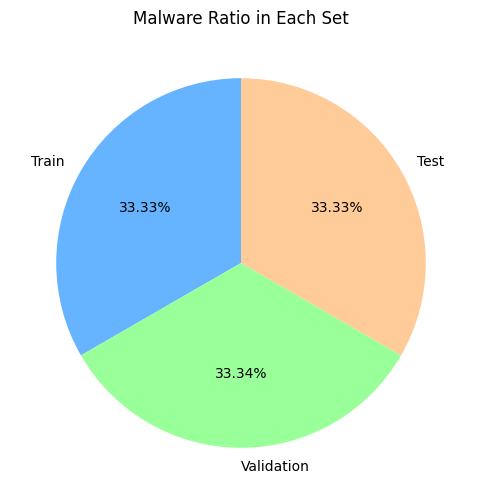

In [23]:
print("\nMalware ratio in each set:")
print("Train:", y_train.mean())
print("Validation:", y_val.mean())
print("Test:", y_test.mean(),"\n")

malware_ratios = {
    "Train": y_train.mean(),
    "Validation": y_val.mean(),
    "Test": y_test.mean()
}

labels = malware_ratios.keys()
sizes = [v * 100 for v in malware_ratios.values()]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.2f%%", startangle=90, colors=["#66b3ff","#99ff99","#ffcc99"])
plt.title("Malware Ratio in Each Set")
plt.show()

#8.Data Imbalance

##8.1 Inspect Class Distribution (Before SMOTE)

In [24]:
print("Class distribution in training set (before SMOTE):\n")
print(y_train.value_counts(),"\n")

Class distribution in training set (before SMOTE):

Class
3    2732
4    1774
2    1431
5    1254
1     877
Name: count, dtype: int64 



##8.2 Applying SMOTE on Training Set

In [25]:
X_train_res, y_train_res = SMOTE(random_state=42).fit_resample(X_train, y_train)
print(pd.Series(y_train_res).value_counts())

Class
4    2732
2    2732
1    2732
5    2732
3    2732
Name: count, dtype: int64


/tmp/ipython-input-3664159921.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=before_smote.index, y=before_smote.values, palette='Blues_d')
/tmp/ipython-input-3664159921.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(after_smote.keys()), y=list(after_smote.values()), palette='Greens_d')


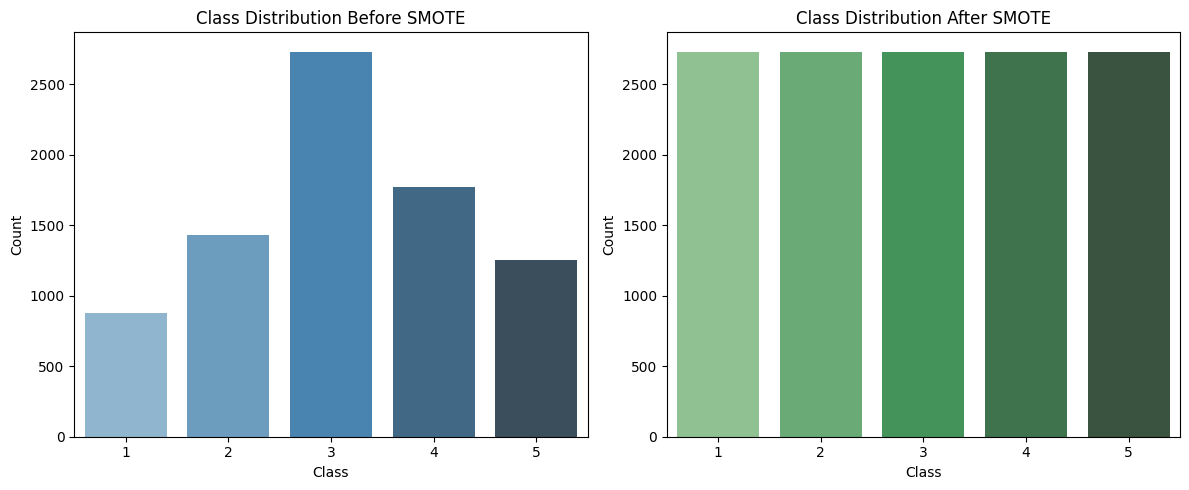

In [26]:
before_smote = y_train.value_counts().sort_index()

after_smote = Counter(y_train_res)

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.barplot(x=before_smote.index, y=before_smote.values, palette='Blues_d')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.barplot(x=list(after_smote.keys()), y=list(after_smote.values()), palette='Greens_d')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

##8.3 Confirm Balanced Distribution

In [27]:
print("Final shape of X_train_resampled:", X_train_res.shape)
print("Final shape of y_train_resampled:", y_train_res.shape)

Final shape of X_train_resampled: (13660, 480)
Final shape of y_train_resampled: (13660,)


#9.Feature Selection

##9.1 Extract Feature Importances

In [31]:
y_train_res_adjusted = y_train_res - 1

lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train_res, y_train_res_adjusted)

feature_importances = pd.DataFrame({
    "Feature": X_train_res.columns,
    "Importance": lgb_model.feature_importances_
})

importance_threshold = feature_importances["Importance"].mean()
top_features = feature_importances[feature_importances["Importance"] >= importance_threshold]["Feature"]

print("Number of selected top features:", len(top_features))
print("Top features:\n", top_features.tolist())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.121844 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22736
[LightGBM] [Info] Number of data points in the train set: 13660, number of used features: 309
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
Number of selected top features: 119
Top features:
 ['ACCESS_PERSONAL_INFO___', 'CREATE_FOLDER_____', 'CREATE_THREAD_____', 'DEVICE_ACCESS_____', 'FS_ACCESS____', 'FS_ACCESS()____', 'FS_ACCESS(CREATE)____', 'FS_ACCESS(CREATE__READ__WRITE)', 'FS_ACCESS(CREATE__WRITE)__', 'FS_ACCESS(READ)____', 'FS_ACCESS(WRITE)____', 'FS_PIPE_ACCESS___', 'FS_PIPE_ACCESS(READ__WRITE)_', 'NETWORK_ACCESS____', 'NETWORK_ACCESS()____', 'NETWORK_ACCESS(READ__

##9.2 Select Top Important Features

In [29]:
top_features_list = top_features.tolist()

X_train_top = X_train_res[top_features_list]
X_val_top = X_val[top_features_list]
X_test_top = X_test[top_features_list]

print("Shapes after selecting top features:")
print("X_train_top:", X_train_top.shape)
print("X_val_top:", X_val_top.shape)
print("X_test_top:", X_test_top.shape)

Shapes after selecting top features:
X_train_top: (13660, 119)
X_val_top: (1729, 119)
X_test_top: (1729, 119)
